In [1]:
!pip install -U pynwb
from pynwb import NWBHDF5IO
!pip install nwbwidgets
from nwbwidgets import nwb2widget
from scipy.signal import butter, filtfilt
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.9/131.9 kB 2.3 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pynwb
    Found existing installation: pynwb 2.3.2
    Uninstalling pynwb-2.3.2:
      Successfully uninstalled pynwb-2.3.2


In [2]:
# opening ecephys probe file
!ls
filepath = '/Users/poggi/Documents/Maier Lab/NWB Data/sub-699733573_ses-715093703_probe-810755797_ecephys.nwb'
io = NWBHDF5IO(filepath, 'r',load_namespaces = True)  # open the file in read mode 'r'
nwb = io.read() # nwb dataset

3lfps_random.png
5 neuron possible states figure.png
6 neuron possible states figure.png
Band_Pass_Filters.ipynb
BinarizedStateSpace.png
Consciousness_Calculator_3Neurons.ipynb
Consciousness_Calculator_LFP.ipynb
Consciousness_Calculator_LFP_2.0.ipynb
Correct_State_by_State_Transition_Matrix_3Neurons_five_secs.png
Dax_NWB_applied_to_IIT.py
High_Pass_Filter.ipynb
Iterating Over Permutations of Binary List.ipynb
Pax_Consciousness_Calculator.ipynb
Pax_Consciousness_Calculator_3Spikes.ipynb
Pax_Consciousness_Calculator_5Spikes.ipynb
Pax_NWB_applied_to_IIT.py
Phi_Values_Graph.ipynb
PossibleStates.png
PossibleStates_3Neurons.png
PossibleStates_4Neurons.png
TPM3.png
TPM_3Neurons_five_secs_revrocket.png
TPM_50_bin.png
TPM_yellow_blue.png
TPM_yellow_blue_4 nodes 20 seconds.png
TPM_yellow_blue_4 nodes 4 mins seconds.png
__pyphi_cache__
calcStatebyStateTPM.m
compute_phi_lfp.ipynb
compute_phi_lfp_function.py
compute_phi_lfp_int.py
compute_phi_lfp_opt.py
compute_phi_lfp_rand.ipynb
outputVISrl.png
ph

/Users/poggi/miniconda3/envs/pyphi_lfp/lib/python3.10/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.6.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/Users/poggi/miniconda3/envs/pyphi_lfp/lib/python3.10/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.6.0-alpha is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


In [3]:
lfp_data = nwb.acquisition
lfp_data = lfp_data['probe_810755797_lfp_data']
lfp_data = lfp_data.data
lfp_df = pd.DataFrame(lfp_data)
shape = lfp_df.shape
print(shape)
# Retrieve the sampling rate from the NWB file
sampling_rate = nwb.electrode_groups['probeA'].lfp_sampling_rate

(10715666, 93)


In [14]:
# Convert the desired time range in seconds to indices
start_time_seconds = 0
end_time_seconds = 250  # 250 seconds
start_index = int(start_time_seconds * sampling_rate)
end_index = int(end_time_seconds * sampling_rate)

# Slice the LFP data
lfp_data_sliced = lfp_df.iloc[start_index:end_index]

# Select three random channels
num_channels = 3
all_channels = lfp_data_sliced.columns.tolist()
random_channels = random.sample(all_channels, num_channels)

# Slice the data for the selected random channels
lfp_data_sliced_random = lfp_data_sliced[random_channels]

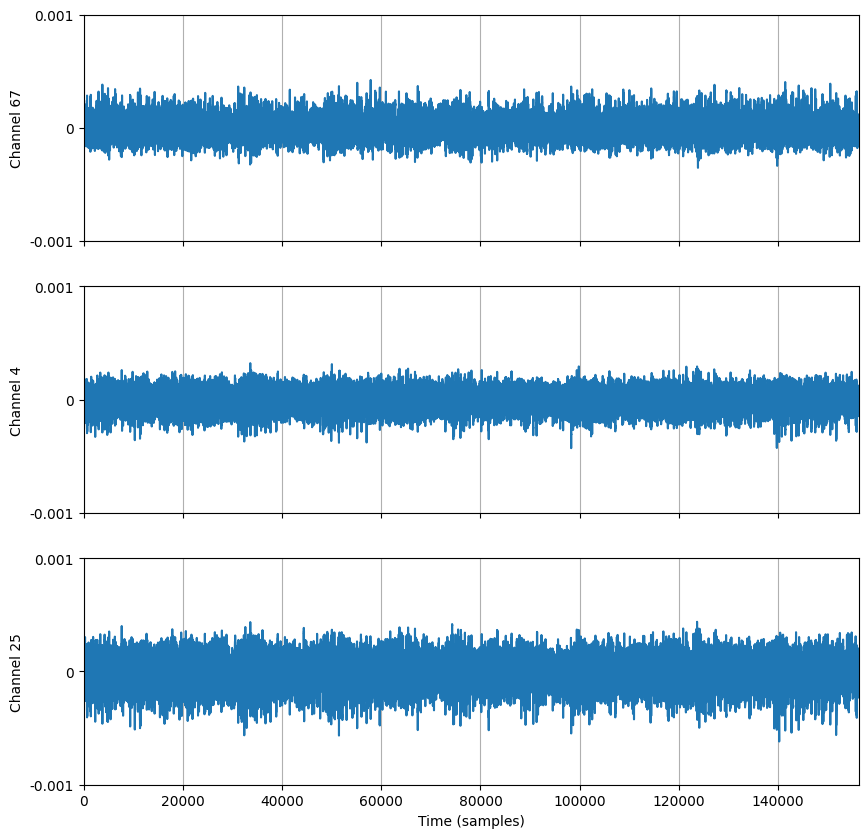

In [15]:
# graph the three channels
fig, ax = plt.subplots(num_channels, 1, figsize=(10, 10), sharex=True)
for i in range(num_channels):
    ax[i].plot(lfp_data_sliced_random.iloc[:, i])
    ax[i].set_ylabel('Channel {}'.format(random_channels[i]))
    ax[i].set_xlim([start_index, end_index])
    ax[i].set_ylim([-.001, .001])
    ax[i].set_yticks([-.001, 0, .001])
    ax[i].set_yticklabels([-.001, 0, .001])
    ax[i].grid(True)
ax[i].set_xlabel('Time (samples)')
plt.show()

In [16]:
from scipy.signal import butter, filtfilt
import numpy as np

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    y_abs = np.abs(y)
    return y_abs

# Retrieve the sampling rate from the NWB file
sampling_rate = nwb.electrode_groups['probeA'].lfp_sampling_rate

# Apply bandpass filter to each of the random channels separately
filtered_lfp_sliced_random = lfp_data_sliced_random.apply(lambda x: bandpass_filter(x, lowcut=8, highcut=12, fs=sampling_rate))


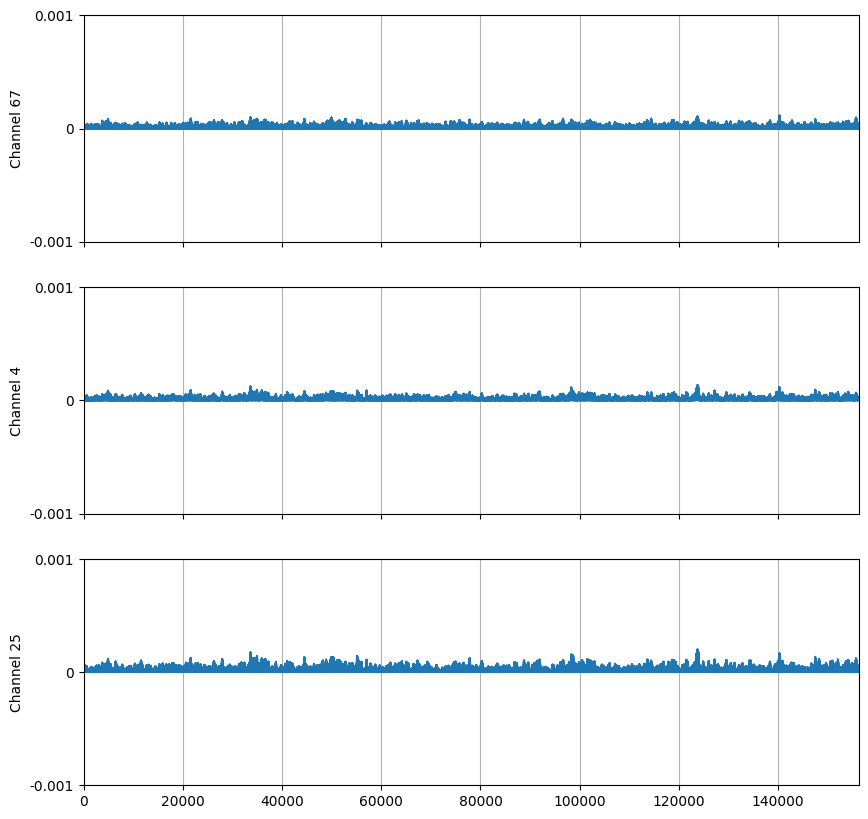

In [17]:
# graph the three channels
fig, ax = plt.subplots(num_channels, 1, figsize=(10, 10), sharex=True)
for i in range(num_channels):
    ax[i].plot(filtered_lfp_sliced_random.iloc[:, i])
    ax[i].set_ylabel('Channel {}'.format(random_channels[i]))
    ax[i].set_xlim([start_index, end_index])
    ax[i].set_ylim([-.0001, .0001])
    ax[i].set_yticks([-.001, 0, .001])
    ax[i].set_yticklabels([-.001, 0, .001])
    ax[i].grid(True)

In [18]:
# Apply bandpass filter to each of the random channels separately
filtered_lfp_sliced_random = lfp_data_sliced_random.apply(lambda x: bandpass_filter(x, lowcut=35, highcut=65, fs=sampling_rate))


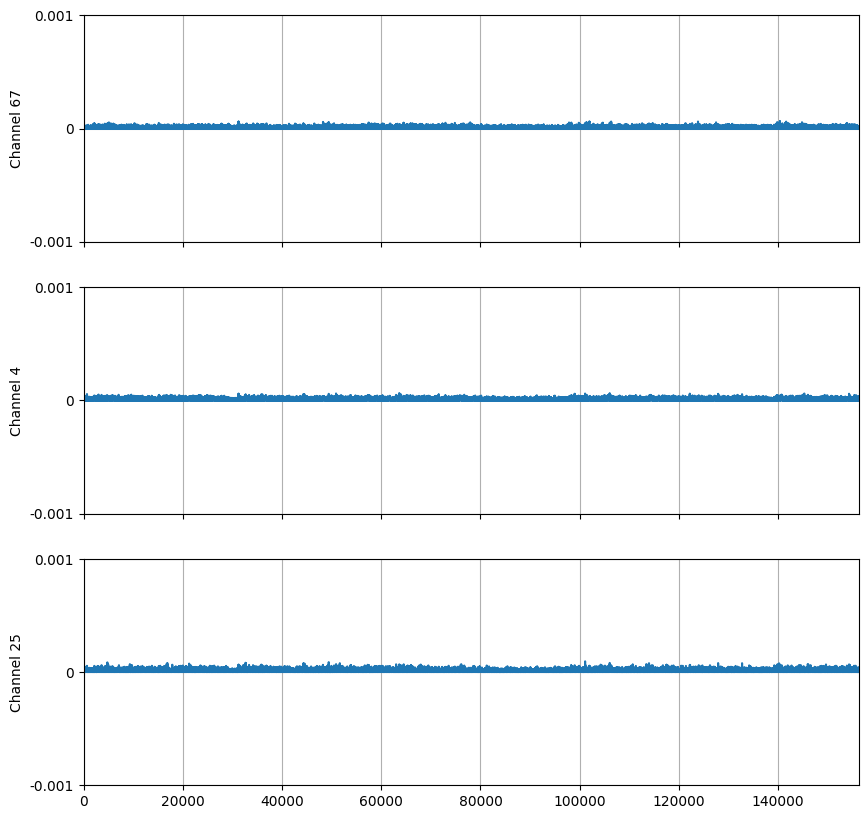

In [19]:
# graph the three channels
fig, ax = plt.subplots(num_channels, 1, figsize=(10, 10), sharex=True)
for i in range(num_channels):
    ax[i].plot(filtered_lfp_sliced_random.iloc[:, i])
    ax[i].set_ylabel('Channel {}'.format(random_channels[i]))
    ax[i].set_xlim([start_index, end_index])
    ax[i].set_ylim([-.0001, .0001])
    ax[i].set_yticks([-.001, 0, .001])
    ax[i].set_yticklabels([-.001, 0, .001])
    ax[i].grid(True)